# Binary Classification using Perceptron

Classify cat and kitten based on grumpy proportion and sleep proportion

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame({'sleep_proportion':[0.2, 0.4, 0.5, 0.7], 
                   'grumpy_proportion':[0.1, 0.6, 0.2, 0.9], 
                   'prediction':['kitten', 'kitten', 'kitten', 'adult']})
df.head()

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten
3,0.7,0.9,adult


   sleep_proportion  grumpy_proportion prediction
0               0.2                0.1     kitten
1               0.4                0.6     kitten
2               0.5                0.2     kitten
   sleep_proportion  grumpy_proportion prediction
3               0.7                0.9      adult


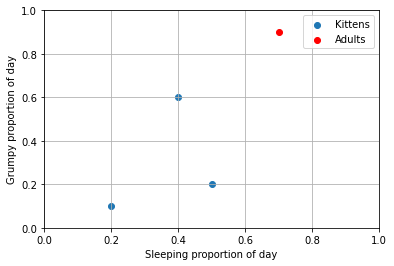

In [19]:
kittens = df[df['prediction'] == 'kitten'] #sliced data for plotting only
adults = df[df['prediction'] == 'adult']
print(kittens)
print(adults)

plt.scatter(kittens['sleep_proportion'], kittens['grumpy_proportion'], 
            label='Kittens')
plt.scatter(adults['sleep_proportion'], adults['grumpy_proportion'], 
            color='r', label='Adults')
plt.xlabel("Sleeping proportion of day")
plt.ylabel("Grumpy proportion of day")
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [20]:
df['bprediction'] = df['prediction'].apply(lambda x:x == 'kitten')
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False


In [21]:
from sklearn.linear_model import Perceptron

classifier = Perceptron(max_iter=10)
model = classifier.fit(df[['sleep_proportion','grumpy_proportion']], df['bprediction'])

c:\users\eduva\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [22]:
model.predict([[0.9,0.8]])

array([False])

In [23]:
model.predict([[0.3,0.3]])

array([ True])

In [24]:
model.predict([[0.9,0.8],[0.3,0.3],[0.6,0.7]])

array([False,  True, False])

In [25]:
model.classes_

array([False,  True])

In [26]:
model.coef_

array([[-0.7, -1. ]])

In [27]:
model.intercept_

array([1.])

In [28]:
model.predict([[0,0],[0,0.1],[0,0.2]])

array([ True,  True,  True])

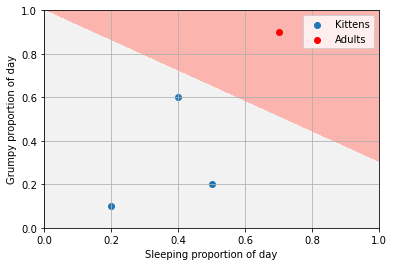

In [29]:
%matplotlib inline
import numpy as np 

x_min, x_max = 0, 1 # sleepy
y_min, y_max = 0, 1 # grumpy

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))
# print(xx); print(yy);
xx_lin = xx.ravel(); #print(xx_lin);
yy_lin = yy.ravel(); #print(yy_lin);
pred_input = np.c_[xx_lin, yy_lin]; #print(pred_input)

Z = model.predict(pred_input); #print(Z);
Z = Z.reshape(xx.shape); #print(Z);

# Countour plot requires 2 dimentional matrix
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(kittens['sleep_proportion'], kittens['grumpy_proportion'], 
            label='Kittens')
plt.scatter(adults['sleep_proportion'], adults['grumpy_proportion'], 
            color='r', label='Adults')
plt.xlabel("Sleeping proportion of day")
plt.ylabel("Grumpy proportion of day")
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [30]:
from sklearn.metrics import confusion_matrix

actual = df['bprediction']
pred = model.predict(df[['sleep_proportion','grumpy_proportion']])
print(confusion_matrix(actual, pred))

[[1 0]
 [0 3]]


# Support Vector Machine

In [31]:
from sklearn.svm import SVC
SVCClassifier = SVC(kernel='linear',C= 10, max_iter=5)

SVCModel = SVCClassifier.fit(df[['sleep_proportion','grumpy_proportion']], df['bprediction'])

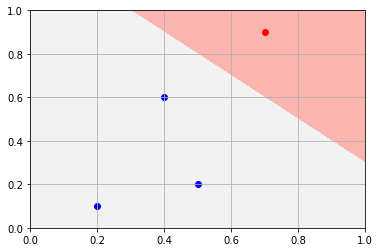

In [32]:
SVC_Z = SVCModel.predict(pred_input) 
SVC_Z = SVC_Z.reshape(xx.shape)
#print(SVCModel.predict([[0, 0], [1, 1]]))

# Countour plot requires 2 dimentional matrix
plt.contourf(xx, yy, SVC_Z, cmap=plt.cm.Pastel1)

plt.scatter(kittens['sleep_proportion'],
            kittens['grumpy_proportion'], 
            color='b', label='Kittens')
plt.scatter(adults['sleep_proportion'],
            adults['grumpy_proportion'], 
            color='r', label='Adults')
plt.axis([0,1,0,1])
plt.grid()